In [1]:
%matplotlib inline

In [2]:
import matplotlib.figure as figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression

In [45]:
raw_data = pd.read_csv('gasoline.csv', encoding='SHIFT-JIS', index_col=0)

do_autoscaling = True  # True or False

In [46]:
train_octane = raw_data.iloc[0:50, 0]
test_octane = raw_data.iloc[50:60, 0]
train_data = raw_data.iloc[0:50, 1:]
test_data=raw_data.iloc[50:60, 1:]

In [47]:
print(train_octane)
print(test_octane)
print(train_data)
print(test_data)

1     85.30
2     85.25
3     88.45
4     83.40
5     87.90
6     85.50
7     88.90
8     88.30
9     88.70
10    88.45
11    88.75
12    88.25
13    87.30
14    88.00
15    88.70
16    85.50
17    88.65
18    88.75
19    85.40
20    88.60
21    87.00
22    87.15
23    87.05
24    87.25
25    86.85
26    88.65
27    86.60
28    86.00
29    86.10
30    86.50
31    86.30
32    84.40
33    84.70
34    84.60
35    84.50
36    88.10
37    85.25
38    88.40
39    88.20
40    88.40
41    88.55
42    88.35
43    88.20
44    85.30
45    88.50
46    88.25
47    88.00
48    88.85
49    88.45
50    88.70
Name: octane, dtype: float64
51    88.10
52    87.60
53    88.35
54    85.10
55    85.10
56    84.70
57    87.20
58    86.60
59    89.60
60    87.10
Name: octane, dtype: float64
    NIR.900 nm  NIR.902 nm  NIR.904 nm  NIR.906 nm  NIR.908 nm  NIR.910 nm  \
1    -0.050193   -0.045903   -0.042187   -0.037177   -0.033348   -0.031207   
2    -0.044227   -0.039602   -0.035673   -0.030911   -0.026675   -

In [48]:
if do_autoscaling:
    autoscaled_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0, ddof=1)
else:
    autoscaled_data = train_data

In [49]:
autoscaled_data

,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,NIR.918 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
1,0.535809,0.309974,0.266310,0.349637,0.238764,0.183860,0.131429,0.395743,0.490246,0.794279,...,-0.301419,0.252963,0.097821,-0.467943,-2.007516,-1.037423,0.733817,0.416025,1.362850,0.569228
2,1.801953,1.682623,1.660016,1.637674,1.615287,1.648095,1.605159,1.552079,1.580729,1.507238,...,-2.610289,-2.481946,-2.094026,-2.149916,-1.571152,0.221643,-0.749109,-0.396661,0.083102,-0.651972
3,1.241675,1.321434,1.380590,1.525233,1.647260,1.752883,1.837916,1.633973,1.508335,1.250119,...,-1.976962,-1.780896,-1.718502,-1.286491,-1.069921,-0.023509,-0.634215,-0.483452,0.249852,-0.109929
4,1.276055,1.107945,1.042113,0.897248,0.886903,0.887834,0.919919,0.988444,1.174158,1.230073,...,-1.574642,-1.724973,-1.604711,-1.535853,-0.940122,-0.180103,-0.869768,-0.821101,0.416459,-0.222053
5,0.394466,0.475101,0.514927,0.518196,0.362739,0.125777,-0.140811,-0.254893,-0.249050,-0.238554,...,1.498686,0.749132,0.792730,0.931757,1.252021,0.877459,-0.405486,-0.166761,0.431378,-0.428656
6,0.981272,0.999239,0.988410,0.999206,0.899899,0.885838,0.851810,0.884161,1.057787,1.205668,...,0.215708,-0.252430,0.034148,0.225007,0.721394,0.546394,-0.305233,-0.296301,0.057761,-0.173828
7,0.596718,0.602977,0.618053,0.649959,0.549013,0.508403,0.550154,0.593310,0.620308,0.538903,...,0.883576,0.321785,0.200106,0.439322,-0.171585,0.598605,-0.650939,-0.691560,-0.324635,-0.564564
8,0.726813,0.770719,0.856400,0.963027,1.014386,1.132339,1.105098,1.023401,0.991408,0.762684,...,-0.648658,-0.876370,-0.723738,-0.773662,-1.132567,0.514309,-0.561977,-0.603140,0.080390,-1.237090
9,0.601175,0.663756,0.700426,0.806596,0.699599,0.746121,0.727436,0.727443,0.755763,0.609066,...,0.385462,-0.102967,-0.216488,-0.420928,-0.322810,0.399863,-0.841784,-0.895452,-0.780770,-0.802622
10,0.353082,0.358989,0.376283,0.435149,0.294460,0.331760,0.277717,0.309725,0.360392,0.269800,...,0.656087,0.271412,-0.075631,0.246683,-0.331890,0.484435,-0.808336,-0.920374,-0.750076,-1.015308


In [50]:
# PCA
# pca_results = PCA(n_components =3)
pca_results = PCA()
scoreT = pca_results.fit_transform(autoscaled_data)
loading_vector = pca_results.components_.transpose()

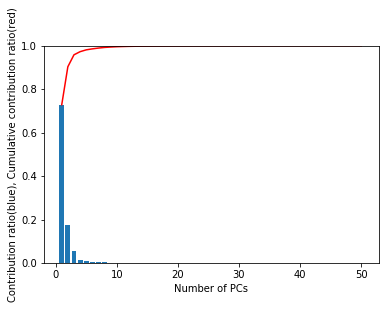

In [51]:
# Check contribution ratio and cumulative contribution ratio of each PC
contribution_ratio = pca_results.explained_variance_ratio_
cumulative_contribution_ratio = np.cumsum(contribution_ratio)
plt.bar(np.arange(1, len(contribution_ratio) + 1), contribution_ratio, align='center')
plt.plot(np.arange(1, len(cumulative_contribution_ratio) + 1), cumulative_contribution_ratio, 'r-')
plt.ylim(0, 1)
plt.xlabel('Number of PCs')
plt.ylabel('Contribution ratio(blue), Cumulative contribution ratio(red)')
plt.show()

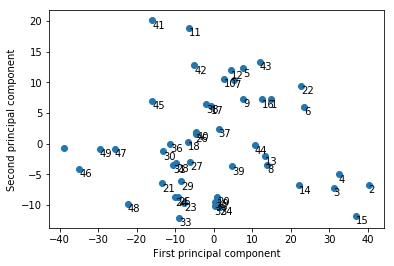

In [54]:
# Check plot of PC1 vs. PC2
plt.scatter(scoreT[:, 0], scoreT[:, 1])
for number_of_samples in np.arange(0, train_data.shape[0] - 1):
    plt.text(scoreT[number_of_samples, 0], scoreT[number_of_samples, 1], train_data.index[number_of_samples],
             horizontalalignment='left', verticalalignment='top')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

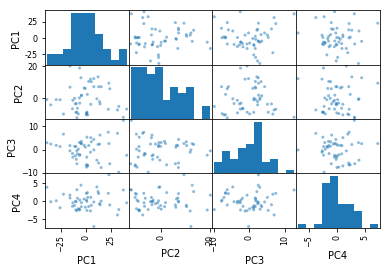

In [55]:
# Scatter plots of PC1, PC2, PC3 and PC4
if scoreT.shape[1] > 3:
    ScoreTpd = pd.DataFrame(scoreT[:, :4])
    ScoreTpd.columns = ['PC1', 'PC2', 'PC3', 'PC4']
    scatter_matrix(ScoreTpd)
    plt.show()

In [ ]:
pls_component_number = 2

max_pls_component_number = 50

# cross validation fold number
fold_number = 5

threshold_of_rate_of_same_value = 0.79

do_autoscaling = True  # True or False

In [ ]:
pls_components = np.arange(1, min(np.linalg.matrix_rank(autoscaled_X) + 1, max_pls_component_number + 1), 1)

r2all = list()
r2cvall = list()
    
for pls_component in pls_components:
    pls_model_in_cv = PLSRegression(n_components=pls_component)
    pls_model_in_cv.fit(autoscaled_X, autoscaled_y)
        
    calculated_y_in_cv = np.ndarray.flatten(pls_model_in_cv.predict(autoscaled_X))
    estimated_y_in_cv = np.ndarray.flatten(
        model_selection.cross_val_predict(pls_model_in_cv, autoscaled_X, autoscaled_y, cv=fold_number))
        
    if do_autoscaling:
        calculated_y_in_cv = calculated_y_in_cv * y.std(ddof=1) + y.mean()
        estimated_y_in_cv = estimated_y_in_cv * y.std(ddof=1) + y.mean()
        
    r2all.append(float(1 - sum((y - calculated_y_in_cv) ** 2) / sum((y - y.mean()) ** 2)))
    r2cvall.append(float(1 - sum((y - estimated_y_in_cv) ** 2) / sum((y - y.mean()) ** 2)))
    
plt.plot(pls_components, r2all, 'bo-')
plt.plot(pls_components, r2cvall, 'ro-')
plt.ylim(0, 1)
plt.xlabel('Number of PLS components')
plt.ylabel('r2(blue), r2cv(red)')
plt.show()
optimal_pls_component_number = np.where(r2cvall == np.max(r2cvall))
optimal_pls_component_number = optimal_pls_component_number[0][0] + 1
regression_model = PLSRegression(n_components=optimal_pls_component_number)

regression_model.fit(autoscaled_X, autoscaled_y)


In [ ]:
# calculate y
calculated_y = np.ndarray.flatten(regression_model.predict(autoscaled_X))
estimated_y = np.ndarray.flatten(
    model_selection.cross_val_predict(regression_model, autoscaled_X, autoscaled_y, cv=fold_number))

if do_autoscaling:
    calculated_y = calculated_y * y.std(ddof=1) + y.mean()
    estimated_y = estimated_y * y.std(ddof=1) + y.mean()

# r2
print('r2: {0}'.format(float(1 - sum((y - calculated_y) ** 2) / sum((y - y.mean()) ** 2))))

In [ ]:
# yy-plot
plt.figure(figsize=figure.figaspect(1))
plt.scatter(y, calculated_y)
YMax = np.max(np.array([np.array(y), calculated_y]))
YMin = np.min(np.array([np.array(y), calculated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')
plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Calculated Y')
plt.show()

In [ ]:
plt.figure(figsize=figure.figaspect(1))

plt.scatter(y, estimated_y)

YMax = np.max(np.array([np.array(y), estimated_y]))
YMin = np.min(np.array([np.array(y), estimated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')

plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Estimated Y')
plt.show()


In [ ]:
 standard regression coefficients
standard_regression_coefficients = regression_model.coef_
standard_regression_coefficients = pd.DataFrame(standard_regression_coefficients)
standard_regression_coefficients.index = X.columns
standard_regression_coefficients.columns = ['standard regression coefficient']
standard_regression_coefficients.to_csv('standard_regression_coefficients.csv')
